### O que é o t de Student?

O **t de Student** é uma distribuição de probabilidade usada para fazer inferências estatísticas sobre a média de uma população, especialmente quando a **amostra é pequena** (geralmente \( n < 30 \)) e o desvio padrão da população não é conhecido.

### Para que serve o t de Student?

A distribuição t de Student é usada principalmente em **testes de hipóteses** e na **construção de intervalos de confiança** quando se trabalha com amostras pequenas. Ela é uma ferramenta fundamental em estatísticas inferenciais, e seu uso está relacionado a situações em que o tamanho da amostra é limitado ou o desvio padrão da população é desconhecido.

#### Principais usos do t de Student:

1. **Testes de Hipóteses para a Média**:
   - O teste t é utilizado para verificar se a média de uma amostra é significativamente diferente de um valor específico ou de outra média. 
   - Exemplos de testes incluem:
     - **Teste t unilateral**: Para verificar se a média de uma amostra é maior ou menor que a média da população (ou de outro grupo).
     - **Teste t bilateral**: Para verificar se a média da amostra é diferente da média da população, sem especificar se será maior ou menor.

2. **Construção de Intervalos de Confiança**:
   - O t de Student é usado para calcular intervalos de confiança em torno da média amostral quando o tamanho da amostra é pequeno ou o desvio padrão é desconhecido. 
   - O intervalo de confiança ajuda a estimar o intervalo no qual a verdadeira média da população provavelmente se encontra.


### Diferença entre o t de Student e a distribuição normal (z-score)

A distribuição t de Student é usada quando:
- **Tamanho da amostra é pequeno** (tipicamente \( n < 30 \)).
- **Desvio padrão da população é desconhecido**.

A distribuição **normal** (usada para o z-score) é usada quando:
- O **tamanho da amostra é grande** (geralmente \( n > 30 \)).
- O desvio padrão da **população é conhecido**.


### **Case: Avaliação de um novo medicamento**

Suponha que sejamos pesquisadores que estão avaliando um novo medicamento para reduzir a pressão arterial. Temos um grupo de 10 pacientes e desejamos testar se o novo medicamento reduz a pressão arterial média em relação à pressão arterial normal.

A pressão arterial média de uma população saudável (sem o medicamento) é conhecida e é de **120 mmHg**. Temos a amostra de 10 pacientes que tomaram o medicamento, e mediu sua pressão arterial após 30 dias de uso.

#### Passos do estudo:

1. **Formular as hipóteses:**

Queremos testar se o medicamento **reduziu** a pressão arterial média dos pacientes. Suas hipóteses são:

- **Hipótese nula (H₀)**: O medicamento **não tem efeito**, ou seja, a pressão arterial média é **120 mmHg**.

  H₀ = 120 

- **Hipótese alternativa (H₁)**: O medicamento **reduziu** a pressão arterial média, ou seja, a média é **menor** que 120 mmHg.

  H₁ < 120 


2. **Recebemos os dados dos pacientes depois desses 30 dias:**

In [2]:
x = [118,115,122,120,119,117,121,113,116,118]

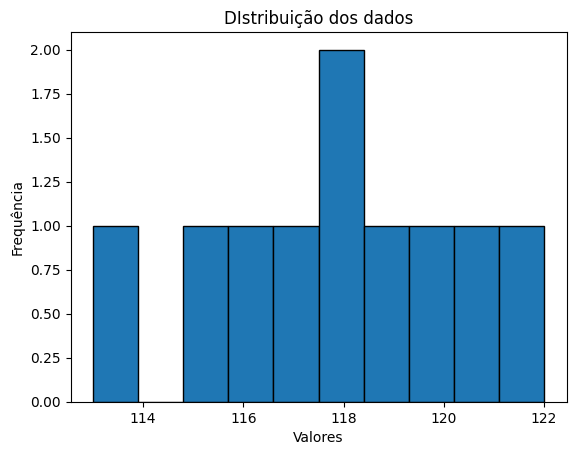

In [3]:
import matplotlib.pyplot as plt

plt.hist(x, bins = len(x), edgecolor = 'black')
plt.title('DIstribuição dos dados')
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.show()

3. **Descobrimos a média dessa amostra**

In [4]:
import statistics

media = statistics.mean(x)
print(f"A média dos dados é {media}")

A média dos dados é 117.9


4. Um dos motivos de usarmos o t-student, é não conhecermos o **desvio padrão populacional**, sendo assim, temos que descobrir e usar o **desvio padrão amostral (s)** para darmos continuidade

In [5]:
desv_amost = statistics.stdev(x)
print(f"O desvio padrão amostral é: {desv_amost}")

O desvio padrão amostral é: 2.766867462592951


5. **Agora já podemos calcular o valor t**
### Cálculo do valor t

O valor t é calculado utilizando a seguinte fórmula:

$$
t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}
$$

Onde:

- \( x barra \) é a **média da amostra**,
- \( μ0 \) é a **média da população** (ou valor da hipótese nula),
- \( s \) é o **desvio padrão da amostra**,
- \( n \) é o **tamanho da amostra**.

In [ ]:
from scipy import stats

t_stat, p_value = stats.ttest_1samp(x, 120)

print(f"Valor de t: {t_stat} e valor de p: {p_value}")

Valor de t: -2.4001088509422903 e de p: 0.039890766746083016


**O valor t de -2.4001 indica que a média da amostra (117.9) está 2.4 desvios padrão abaixo da média hipotética (120)**. Esse valor sugere que a diferença entre a média da amostra e a média hipotética é relativamente grande em comparação com a variabilidade dos dados.
Para um valor t de -2.4001, consultariamos uma tabela de distribuição t para calcular o p-valor, mas a função **stats.ttest_1samp** já me retornou o p-valor baseado nesse valor de t.

Dado que **meu p valor é menor que o nível se significância de 5%**, posso afirmar que um valor tão extremo não foi retornado por acaso dado que a hipótese nula é verdadeira, logo, **posso rejeitar a hipótese nula**, e afirmar que meu remédio de teste fez diferença para meus pacientes.

Lembrando que foi um teste unilateral para saber se a pressão diminuia de maneira estatisticamente significante.

### 1. **Valor t**
- Mede a diferença entre a **média da amostra** e a **média hipotética/comparativa** em unidades do erro padrão.
- Quanto maior o valor t (em valor absoluto), **maior a diferença** entre a média da amostra e a média hipotética, indicando **maior significância**.
- O valor t ajuda a determinar se a média da amostra é estatisticamente diferente da média hipotética.

### 2. **P-valor**
- É a probabilidade de observar uma diferença tão grande quanto a observada (ou mais extrema), **assumindo que a hipótese nula seja verdadeira**.
- Se o p-valor é **baixo** (geralmente menor que 0.05), isso significa que a diferença observada é **pouco provável de ocorrer por acaso**, então **rejeitamos a hipótese nula**.
- Se o p-valor é **alto**, a diferença observada pode ser explicada pelo acaso, e **não rejeitamos a hipótese nula**.
- O p-valor não é uma "probabilidade do valor t", mas sim uma **probabilidade associada à estatística t**.

### 3. **Grau de Liberdade (df)**
- **Graus de liberdade (df)** referem-se ao número de valores independentes que podem variar ao calcular uma estatística.
- No caso do **teste t de Student**, os graus de liberdade são geralmente calculados como:  
  \(df = n - 1\), onde \(n\) é o tamanho da amostra.
- O grau de liberdade influencia a forma da **distribuição t**: com menos graus de liberdade (amostras menores), a distribuição t é mais "larga", e com mais graus de liberdade (amostras grandes), ela se aproxima de uma distribuição normal.